<h2> Data Science for mortals </h2>
<p>
This notebook aims to guide you throught your first steps in the world of Data Science.
<span style="color:white">This is an easter egg</span>
<br />
The general concept of a Data Science project will be presented. After a brief introduction, the dataset will be presented. The goal of this notebook is to produce insights that will help us better understand the data.
</p>
<p>
The final goal of any Data Science project is to <em>automatically product data from existing data</em> in order to achive a defined goal. 
</p>

<p>
The figure below shows how a typical data science project evolves. 
</p>
<img src="https://www.mcgill.ca/datascience/files/datascience/styles/wysiwyg_extra_large/public/steps_1.jpg?itok=1-qto_iw"></img>

<p>
    This notebook will only focus on the first step, <em>Data Exploration</em> : in order to perform our prediction (the number of stars of a git project), we must familiarize ourselves not only with the data but with the whole git universe. This means that their is no magic involved in a Data Science project ; business knowledge is critical to achieve any serious Data Science task. <br> Luckily, some of us can share it with us.
</p>

In [2]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


<h3>Data Loading</h3>
<p>The cell below will load the data set and display its first rows</p>

In [23]:
dataSet = pd.read_csv("../datasetBuild5cc34a31/repos2.csv")
dataSet.head()

,Unnamed: 0,archived,created_at,default_branch,description,fork,forks,forks_count,has_downloads,has_issues,...,open_issues,open_issues_count,"('owner', 'type')","('owner', 'site_admin')",private,size,stargazers_count,subscribers_count,watchers,watchers_count
0,0,False,2017-08-11T06:41:52Z,master,wjj123321,False,0,0,True,True,...,0,0,User,False,False,0,0,0,0,0
1,1,False,2017-08-11T06:41:52Z,master,UI Component Library Base on Vue.js(2.x) and B...,True,0,0,True,False,...,0,0,User,False,False,326,0,1,0,0
2,2,False,2017-08-11T06:41:52Z,master,Palo?the MPP data warehouse,True,0,0,True,False,...,0,0,User,False,False,55118,0,1,0,0
3,3,False,2017-08-11T06:41:54Z,master,ScriptedRESTAPI,True,0,0,True,False,...,0,0,User,False,False,73,0,1,0,0
4,4,False,2017-08-11T06:41:55Z,master,HORISEN sms bulk api v4 mock,True,0,0,True,False,...,0,0,Organization,False,False,18,0,1,0,0


<span>Some basic statistics can also be computed and shown with the following expression : </span>

In [24]:
dataSet.describe()

,Unnamed: 0,forks,forks_count,network_count,open_issues,open_issues_count,size,stargazers_count,subscribers_count,watchers,watchers_count
count,493688.000000,493688.000000,493688.000000,493688.000000,493688.000000,493688.000000,4.936880e+05,493688.000000,493688.000000,493688.000000,493688.000000
mean,246843.500000,0.177562,0.177562,683.663873,0.088080,0.088080,1.644306e+04,0.868147,0.779814,0.868147,0.868147
std,142515.594185,3.546287,3.546287,6454.211627,1.227323,1.227323,1.078338e+05,32.639440,2.166343,32.639440,32.639440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,123421.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+01,0.000000,0.000000,0.000000,0.000000
50%,246843.500000,0.000000,0.000000,1.000000,0.000000,0.000000,2.580000e+02,0.000000,1.000000,0.000000,0.000000
75%,370265.250000,0.000000,0.000000,54.000000,0.000000,0.000000,4.831000e+03,0.000000,1.000000,0.000000,0.000000
max,493687.000000,164.000000,164.000000,185084.000000,54.000000,54.000000,3.586539e+06,1851.000000,98.000000,1851.000000,1851.000000


<p>
    At this point, the simpliest and the most common way of starting the exploration phase is to perform an <em>univariate analysis</em> : we will try to establish simple correlations between our variables - or features  (forks, size, issues, language...) - and the target (stargazers_count).

<br />

    The way of proceeding is simple ; let's ask ourselves the following question :  <b>how the target behaves when we split our dataset depending on the value a feature ?</b>
</p>

<p>
    Before answering this question, a distinction must be made. There are two kind of variables : <br>
    Ones are quantitavite and called <em>numerical</em> (the size of the repo for exemple) and others are qualitative and called <em>categorical</em> (the language of the repo).
</p>

<h3> Insight - qualitative features</h3>

<p>
    As it was said before, their are two kinds of variables. We will take a look at the last ones, the categoricals.
</p>
<p>
As a first approach, we can plot the mean number of starts by langauge :
</p>

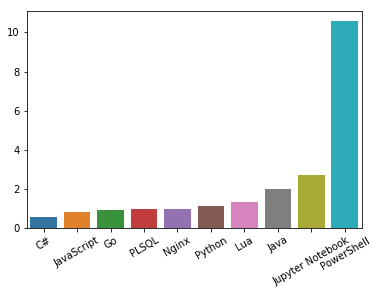

In [34]:
gbLanguage = dataSet.groupby("language.1")["stargazers_count"].mean()
gbLanguage = gbLanguage.sort_values()[-10:]
g = seaborn.barplot(gbLanguage.index.values, gbLanguage.values)#, palette=["#5BA0D1"]*5)
_=g.set_xticklabels(gbLanguage.index.values,rotation=30)
plt.show()

In [32]:
gbLanguage

language.1
Kotlin        0.0
Haskell       0.0
Idris         0.0
Io            0.0
Makefile      0.0
Matlab        0.0
PLpgSQL       0.0
Perl          0.0
PostScript    0.0
Puppet        0.0
Name: stargazers_count, dtype: float64

In [42]:
! ls

job-exec-env.json  steps.jpg
